## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.6/site-packages/arcgis/gis/__init__.py:389: UserWarning: You are logged on as Adrian.Hughes@rspb.org.uk_RSPB with an administrator role, proceed with caution.
  self.users.me.username)


#### Add imagery item

<Item title:"IMG_Coll_Hall" type:Map Image Layer owner:Adrian.Hughes@rspb.org.uk_RSPB>
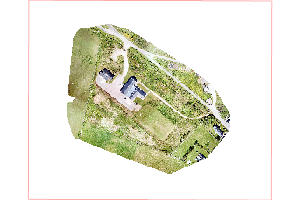

In [2]:
# Item Added From Toolbar
# Title: IMG_Coll_Hall | Type: Map Service | Owner: Adrian.Hughes@rspb.org.uk_RSPB
item = gis.content.get("33aca0231e664441b36b2ff86beb3463")
item

### Share with Merlin Map services and then check

In [3]:
item.share(groups="98c66de52d2642c4a278a314393ce5e9")

{'results': [{'itemId': '33aca0231e664441b36b2ff86beb3463',
   'success': True,
   'notSharedWith': []}]}

In [4]:
item.shared_with

{'everyone': False,
 'org': False,
 'groups': [<Group title:"Merlin Map Services" owner:Adrian.Hughes@rspb.org.uk_RSPB>]}

### Update Tags - note this will overwrite all current tages if you added any when publishing the layer

In [5]:
item.update(item_properties={'tags':'merlin, live_layer'})
item.tags

['merlin', 'live_layer']

### Assign categories <font color =red> REMEMBER TO CHANGE FOR LiDAR!</font>

In [6]:
# get the CategoryManager for this GIS
cs=gis.admin.category_schema


# assign the item to the desired categories, new categories will need to be created in AGOL first
# set to '/Imagery/Drone imagery' but you may want to change to '/Imagery/LiDAR imagery' or /Basemaps/CAD
cs.categorize_item(item,['/Imagery/Drone imagery'])

True

### Change owner to maps_rspb and move to Merlin Live folder

In [7]:
item.reassign_to('Maps_RSPB', target_folder='Merlin_Live')

True

### Set summary, description (including flight date) - <font color=red>REMEMBER TO CHANGE!</font>

In [8]:
Summary = "Coll Hall Drone Imagery, June 2020"
Description = "Coll Hall Drone Imagery. Flown by Ben Jones."
FlightDate = "14/06/2020"
item.update(item_properties={'snippet':Summary, 'description': Description + ' Flight Date: ' + FlightDate})


True

### Enable delete protection

In [9]:
item.protect( enable = True)

{'success': True}